In [115]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Populating the interactive namespace from numpy and matplotlib


Create a linear ramp from -0.5 to 0.5.

<Container object of 3 artists>

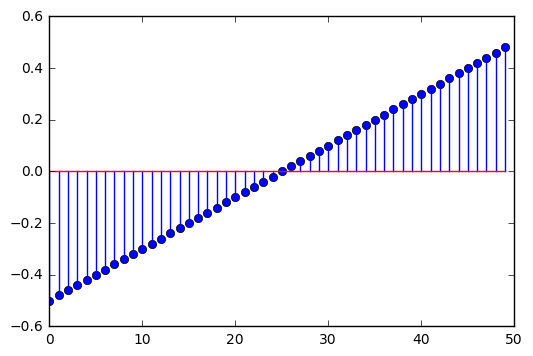

In [116]:
x = np.arange(0,1,0.02) - 0.5
plt.stem(x)

Generate a simple fft.

<Container object of 3 artists>

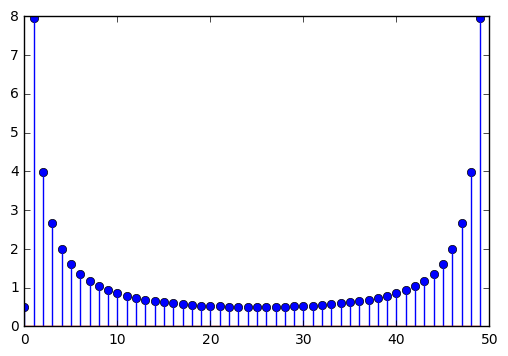

In [117]:
X = np.fft.fft(x)
plt.stem(abs(X))

Shift negative frequencies such that they're around 0Hz.

In [118]:
def dft_shift(X):
    N = len(X)
    positive_half = X[:N/2+1]
    negative_half = X[N/2+1:]
    return np.arange(-N/2+1,N/2+1),np.concatenate((negative_half,positive_half))

/Users/deepakantony/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/deepakantony/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<Container object of 3 artists>

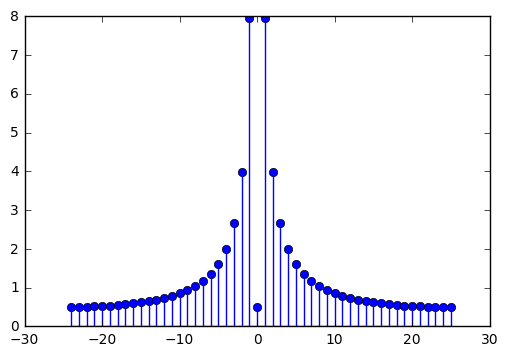

In [119]:
n,Xshifted = dft_shift(X)
plt.stem(n, abs(Xshifted))

Map frequency indices to an actual frequency value.

In [120]:
def dft_map(X, Fs, shift=True):
    resolution = Fs/len(X)
    if shift:
        n, X = dft_shift(X)
    else:
        n = np.arange(len(X))
    n = n*resolution
    return n,X

In [121]:
import IPython
from scipy.io import wavfile
Fs,x = wavfile.read("glockenspiel.wav")

/Users/deepakantony/anaconda/lib/python3.5/site-packages/scipy/io/wavfile.py:267: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [122]:
IPython.display.Audio(np.transpose(x),rate=Fs)

/Users/deepakantony/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/deepakantony/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


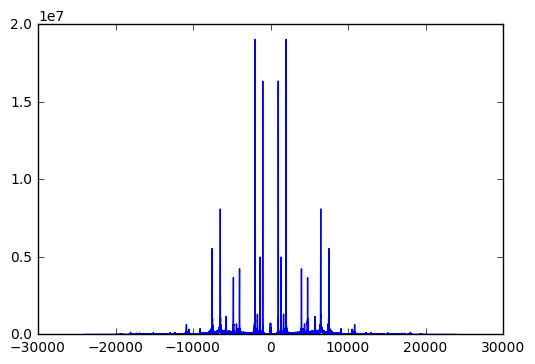

In [127]:
X = np.fft.fft(np.transpose(x)[0][:Fs])
n,Xshifted = dft_map(X, Fs)
plt.plot(n,abs(Xshifted))

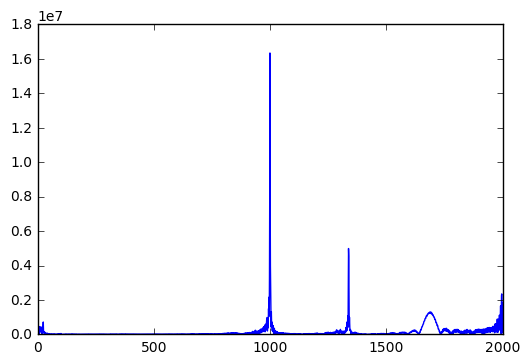

In [131]:
n,X = dft_map(X,Fs,shift=False)
plt.plot(n[:2000], abs(X[:2000]))